In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn

In [18]:
L = 8
D = 8
p = qtn.MPS_rand_state(L, bond_dim=D, phys_dim=2, cyclic=False)
pH = p.H

In [19]:
p.left_canonize()
p.show()

 2 4 8 8 8 8 8 
>─>─>─>─>─>─>─●
│ │ │ │ │ │ │ │


In [74]:
def tilted_ising(L, J=1, h=0.5, g=0.3):
    builder = qtn.SpinHam1D(S=1/2, cyclic=False)
    builder += J, 'Z', 'Z'
    builder += h, 'Z'
    builder += g, 'X'
    return builder.build_local_ham(L)


In [58]:
A = tilted_ising(8)

In [59]:
p.compress(form=4)
p.show()

 2 4 8 8 8 4 2 
>─>─>─>─●─<─<─<
│ │ │ │ │ │ │ │


In [60]:
p[6]

Tensor(shape=(4, 2, 2), inds=('_e72957AAABw', '_e72957AAABx', 'k6'), tags=oset(['I6']), left_inds=('_e72957AAABx', 'k6'))

In [61]:
p[4].H @ p[4]

1.0000000000000033

In [62]:
((p.H & p).select(0) ^ all).data.round(12) 

array([[1., 0.],
       [0., 1.]])

In [63]:
p.entropy(5)

0.6843347795859149

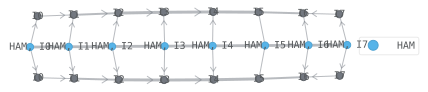

In [64]:
A = qtn.MPO_rand_herm(8, bond_dim=7, tags=['HAM'])
pH = p.H

# This inplace modifies the indices of each to form overlap
p.align_(A, pH)

(pH & A & p).draw(color='HAM', iterations=8)

In [65]:
(pH & A & p) ^ ...

0.002549684305205943

In [75]:
H = tilted_ising(100)

In [71]:
dmrg = qtn.DMRG2(H, bond_dims=[10, 20, 100, 100, 200], cutoffs=1e-10)

In [72]:
dmrg.solve(tol=1e-3, verbosity=1)

1, R, max_bond=(10/10), cutoff:1e-10


100%|###########################################| 99/99 [00:02<00:00, 48.26it/s]

Energy: -27.923567367122114 ... not converged.
2, R, max_bond=(10/20), cutoff:1e-10



100%|##########################################| 99/99 [00:00<00:00, 118.64it/s]


Energy: -27.928311642600853 ... not converged.
3, R, max_bond=(19/100), cutoff:1e-10


100%|##########################################| 99/99 [00:00<00:00, 145.09it/s]

Energy: -27.92898016506128 ... converged!


True

In [76]:
H.terms[1,2]

array([[ 0.5  ,  0.075,  0.075,  0.   ],
       [ 0.075, -0.25 ,  0.   ,  0.075],
       [ 0.075,  0.   , -0.25 ,  0.075],
       [ 0.   ,  0.075,  0.075,  0.   ]])

In [78]:
# tebd

H = tilted_ising(20)
psi0 = qtn.MPS_neel_state(20)
tebd = qtn.TEBD(psi0, H)


In [79]:
tebd.update_to(T=3, tol=1e-4)

t=3, max-bond=3: 100%|##########| 100/100 [00:40<00:00,  2.47%/s]    


In [80]:
psi0.show()

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─●
│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │


In [81]:
tebd.pt.show()

 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 
>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─>─●
│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │
